In [2]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')
import graphviz 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score,classification_report , roc_auc_score,make_scorer
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
import xgboost 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_validate
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("C:/Users/mosto/OneDrive/Documents/churn raw data.csv", encoding='latin-1')

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
print(df.shape)

(10000, 14)


# 4. Data Pre-Processing Phase (important for training)

In [6]:
for column in df: 
  unique_vals = np.unique(df[column])
  nr_values = len(unique_vals)
  if nr_values <12:
      print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
  else:
      print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature RowNumber :10000
The number of values for feature CustomerId :10000
The number of values for feature Surname :2932
The number of values for feature CreditScore :460
The number of values for feature Geography :3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :70
The number of values for feature Tenure :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance :6382
The number of values for feature NumOfProducts :4 -- [1 2 3 4]
The number of values for feature HasCrCard :2 -- [0 1]
The number of values for feature IsActiveMember :2 -- [0 1]
The number of values for feature EstimatedSalary :9999
The number of values for feature Exited :2 -- [0 1]


# Checking for null values

In [7]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# Column name in dataset

In [8]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


# Limiting the data

In [9]:
df2 = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [10]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Visualize the data using seaborn Pairplots       (only numeric columns)

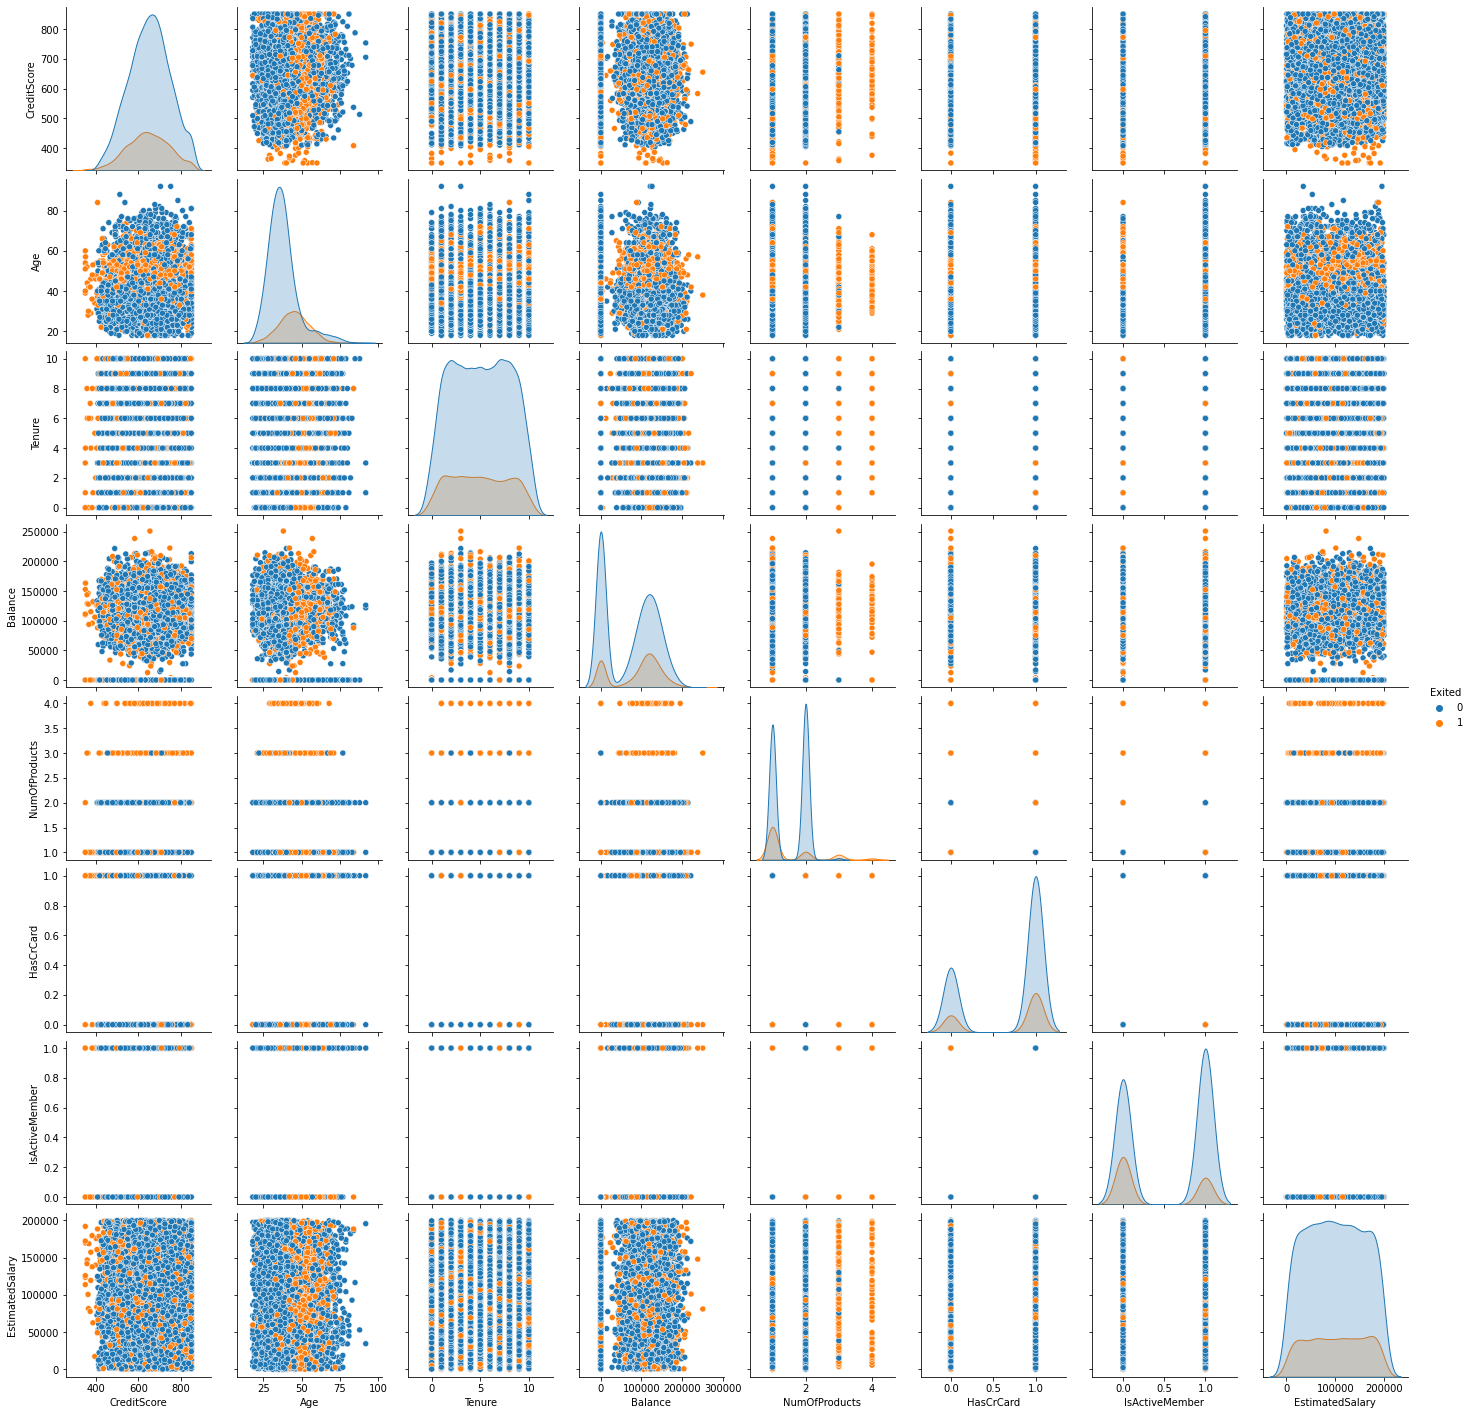

In [11]:
g = sns.pairplot(df2, hue = 'Exited', diag_kws={'bw': 0.2})

# Investigate all the features by our y

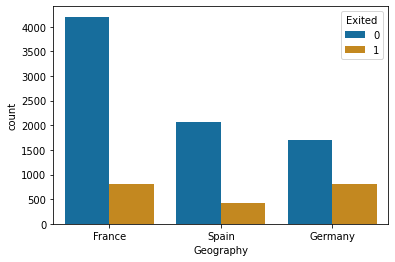

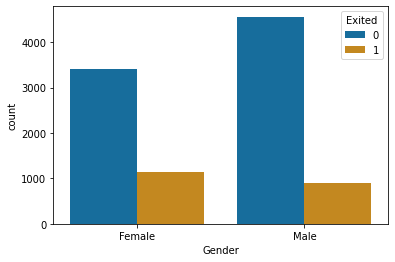

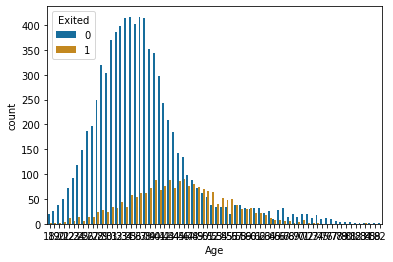

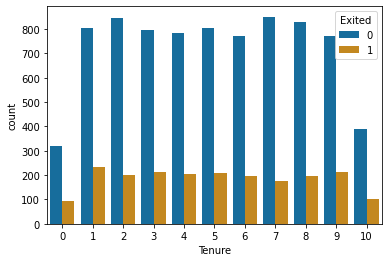

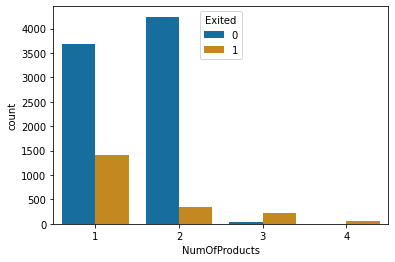

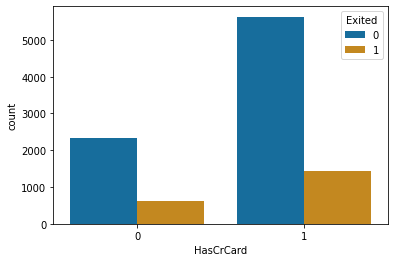

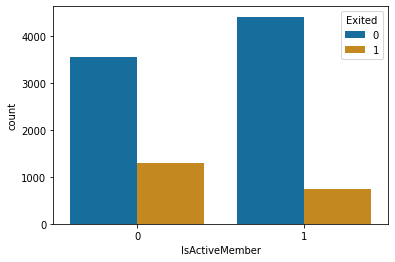

In [12]:
# Investigate all the features by our y

features = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=df2, hue = 'Exited', palette="colorblind")

# Making categorical variables into numeric representation (important for training)

In [13]:
new_df = pd.get_dummies(df2, columns = ['Geography', 'Gender'])
print(new_df.head()) 

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2 

# Search max and min value of each columns

In [14]:
new_df['CreditScore'].min()

350

# Scaling our columns (important for training)

In [15]:
scale_vars = ['CreditScore','EstimatedSalary','Balance']
scaler = MinMaxScaler()
new_df[scale_vars] = scaler.fit_transform(new_df[scale_vars])
print(new_df.head())

   CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538   42       2  0.000000              1          1   
1        0.516   41       1  0.334031              1          0   
2        0.304   42       8  0.636357              3          1   
3        0.698   39       1  0.000000              2          0   
4        1.000   43       2  0.500246              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1         0.506735       1                 1   
1               1         0.562709       0                 0   
2               0         0.569654       1                 1   
3               0         0.469120       0                 1   
4               1         0.395400       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2       

# Correlation


In [16]:
new_df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772


# Delete columns process
x = new_df.iloc[:,:-3]
x

# 5. Splitting the Raw Data - Hold-out validation

In [17]:
new_df = new_df.drop(['Exited'],axis=1)
new_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,42,2,0.000000,1,1,1,0.506735,1,0,0,1,0
1,0.516,41,1,0.334031,1,0,1,0.562709,0,0,1,1,0
2,0.304,42,8,0.636357,3,1,0,0.569654,1,0,0,1,0
3,0.698,39,1,0.000000,2,0,0,0.469120,1,0,0,1,0
4,1.000,43,2,0.500246,1,1,1,0.395400,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,39,5,0.000000,2,1,0,0.481341,1,0,0,0,1
9996,0.332,35,10,0.228657,1,1,1,0.508490,1,0,0,0,1
9997,0.718,36,7,0.000000,1,0,1,0.210390,1,0,0,1,0
9998,0.844,42,3,0.299226,2,1,0,0.464429,0,1,0,0,1


In [18]:
X = new_df
y = df2.iloc[:,10]
print(X)
print(y)

      CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0           0.538   42       2  0.000000              1          1   
1           0.516   41       1  0.334031              1          0   
2           0.304   42       8  0.636357              3          1   
3           0.698   39       1  0.000000              2          0   
4           1.000   43       2  0.500246              1          1   
...           ...  ...     ...       ...            ...        ...   
9995        0.842   39       5  0.000000              2          1   
9996        0.332   35      10  0.228657              1          1   
9997        0.718   36       7  0.000000              1          0   
9998        0.844   42       3  0.299226              2          1   
9999        0.884   28       4  0.518708              1          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0                  1         0.506735                 1                  0   
1  

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

In [20]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1554,0.556,34,4,0.632693,2,1,1,0.630965,1,0,0,0,1
2087,0.732,52,7,0.262942,2,1,0,0.072989,1,0,0,1,0
5470,0.534,25,1,0.408875,2,1,1,0.576934,1,0,0,0,1
2363,0.442,33,9,0.000000,2,0,1,0.387577,1,0,0,1,0
7570,0.694,32,7,0.699347,3,1,0,0.582210,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,0.488,32,4,0.478581,2,1,1,0.814829,0,1,0,1,0
4859,0.888,22,4,0.456122,1,1,1,0.538759,0,0,1,1,0
3264,0.776,35,5,0.642787,2,1,0,0.907178,1,0,0,0,1
9845,0.480,38,9,0.000000,2,1,1,0.743764,0,0,1,1,0


# 6. Running Decision Tree

# Notes:

# Decision Trees are a supervised learning method used for classification and regression
# How it works:

# 1.The ID3 algorithm begins with the original set {S} S as the root node
# 2.On each iteration of the algorithm, it iterates through every unused attribute of the set and calculates the entropy (or information gain) of that attribute
# 3.It then selects the attribute which has the smallest entropy (or largest information gain) value.
# 4.The set is then split by the selected attribute to produce subsets of the data.
# 5.The algorithm continues to recurse on each subset, considering only attributes never selected before.

#Scikit Documentation: https://scikit-learn.org/stable/modules/tree.html

In [21]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [22]:
dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=X.columns,    
    class_names=y.unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)

graph = graphviz.Source(dot_data)
#save in to a pdf file
graph.render(outfile='Churntree.png')

'Churntree.png'

# Feature_importances_show

In [23]:
for i, column in enumerate(X):
    print('Importance of feature {}:, {:.4f}'.format(column, dt.feature_importances_[i]))

Importance of feature CreditScore:, 0.0000
Importance of feature Age:, 0.6223
Importance of feature Tenure:, 0.0000
Importance of feature Balance:, 0.0000
Importance of feature NumOfProducts:, 0.1956
Importance of feature HasCrCard:, 0.0000
Importance of feature IsActiveMember:, 0.1821
Importance of feature EstimatedSalary:, 0.0000
Importance of feature Geography_France:, 0.0000
Importance of feature Geography_Germany:, 0.0000
Importance of feature Geography_Spain:, 0.0000
Importance of feature Gender_Female:, 0.0000
Importance of feature Gender_Male:, 0.0000


In [24]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.8213333333333334
Testing Accuracy is:  0.822


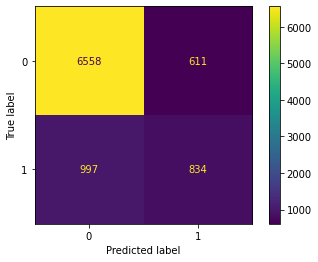

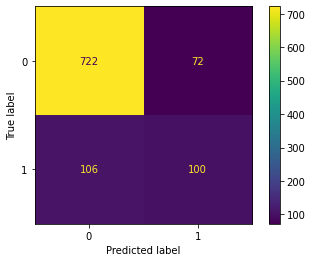

In [25]:
plot_confusion_matrix(dt, X_train,y_train, values_format='d',cmap ='viridis')
plot_confusion_matrix(dt, X_test,y_test, values_format='d',cmap ='viridis')

In [26]:
y_pred = dt.predict(X_train)

In [27]:
print(confusion_matrix(y_train, y_pred))

[[6558  611]
 [ 997  834]]


# plot_roc_curve

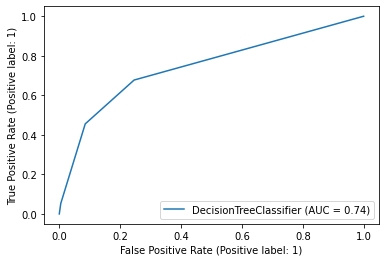

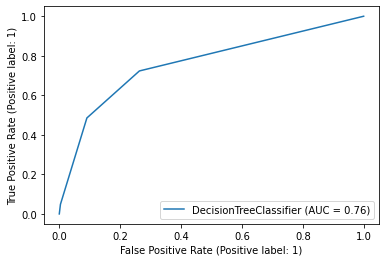

In [28]:
plot_roc_curve(dt, X_train, y_train)
plot_roc_curve(dt, X_test, y_test)

In [29]:
def plot_confusion_matrix(cm, classes=None,values_format = 'd',title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=-500., vmax=9000.,fmt = 'd' ,annot=True, annot_kws={'size':30})
    else:
        sns.heatmap(cm, vmin=-500., vmax=9000.,fmt = 'd')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plotting Confusion Matrix

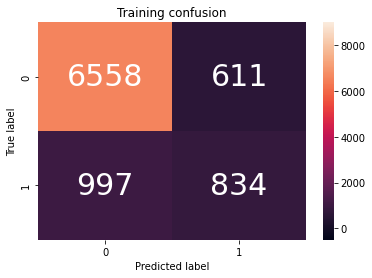

In [30]:
cm = confusion_matrix(y_train, y_pred)
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=dt.classes_,values_format='d',title='Training confusion')

In [31]:
accuracy_score(y_train, y_pred,normalize=True)

0.8213333333333334

# Extracting TN,TP,FP,FN

In [32]:
TP , FP , FN , TN = confusion_matrix(y_train, y_pred).ravel()
print(TP , FP , FN , TN)

6558 611 997 834


# confusion matrix metrics

In [33]:
matrix = classification_report(y_train, y_pred)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      7169
           1       0.58      0.46      0.51      1831

    accuracy                           0.82      9000
   macro avg       0.72      0.69      0.70      9000
weighted avg       0.81      0.82      0.81      9000



# Sensitivity, hit rate, recall, or true positive rate

In [34]:
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")



The True Positive rate / Recall per class is:  0.8680344142951688
The Precision per class is:  0.9147719347189287
The False Alarm rate per class is:  0.4228373702422145
The Miss Rate rate per class is:  0.13196558570483125
The Classification error of each class is 0.17866666666666667
The Accuracy of each class is 0.8213333333333334



# Total averages :

In [35]:

print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

The average Recall is:  0.4340172071475844
The average Precision is:  0.45738596735946435
The average False Alarm is:  0.21141868512110726
The average Miss Rate rate is:  0.06598279285241562
The average Classification error is 0.08933333333333333
The average Accuracy is 0.4106666666666667


# 7.Running Random Forest

# Notes:

# 1.Random forest is an ensemble classifier that consists of many decision trees and outputs the class that is the mode of the class's output by individual trees.
# 2.Takes the average (entropy/information gain) of many Decision Trees via bagging.
# 3.Bagging is short for “bootstrap aggregation,” meaning that samples are chosen with replacement (bootstrapping), and combined (aggregated) by taking their average

In [36]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=None)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X_test)

# Training & Testing Accuracy

In [37]:
print("Training Accuracy is: ", rf.score(X_train, y_train))
print("Testing Accuracy is: ", rf.score(X_test, y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.855


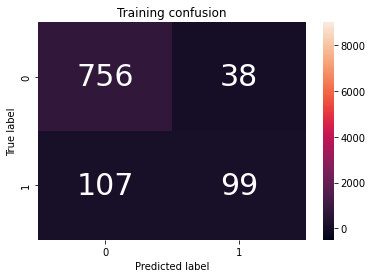

In [38]:
cm = confusion_matrix(y_test, prediction_test)
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',title='Training confusion')

# Tunning Random Forest  (important for training)

# Train prediction

Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = None: 0.999:[7169    0    5 1826]
Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = 2: 0.797:[7169    0 1831    0]
Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = 3: 0.797:[7169    0 1826    5]
Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = 4: 0.801:[7169    0 1791   40]
Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = 5: 0.812:[7169    0 1689  142]
Classification accuracy on test set with n_estimators =50 & max features = sqrt and max_depth = None: 0.999:[7169    0    7 1824]
Classification accuracy on test set with n_estimators =50 & max features = sqrt and max_depth = 2: 0.802:[7169    0 1784   47]
Classification accuracy on test set with n_estimators =50 & max features = sqrt and max_depth = 3: 0.818:[7160    9 1627

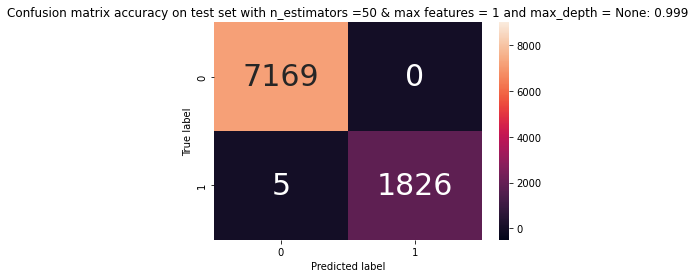

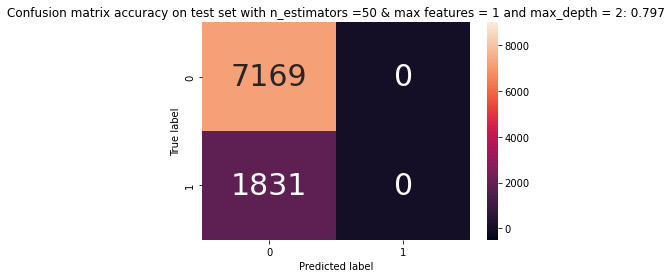

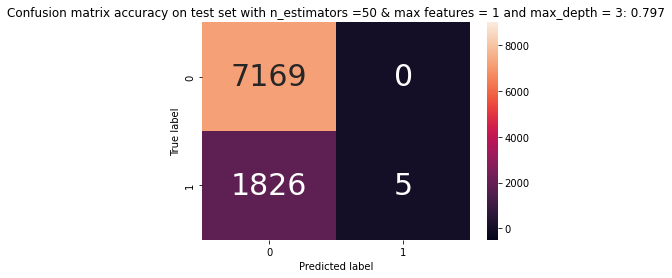

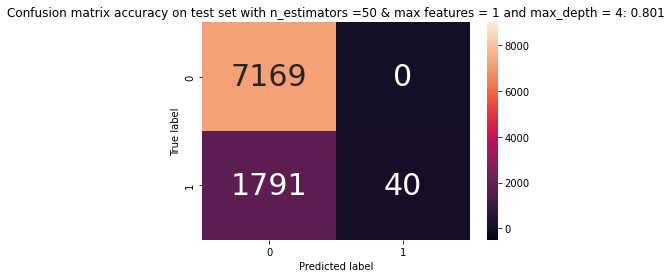

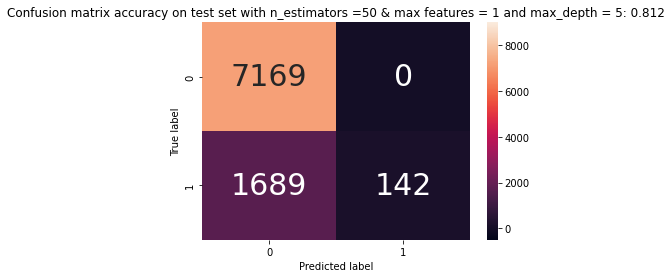

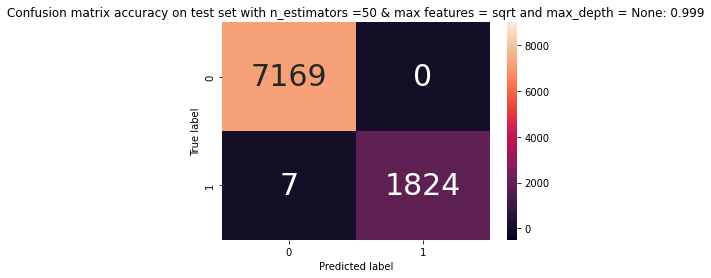

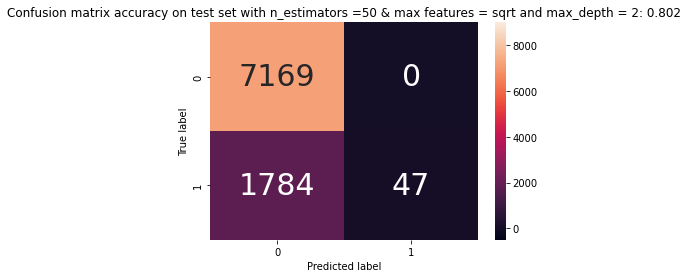

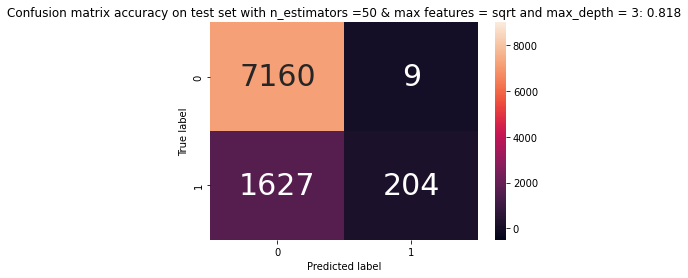

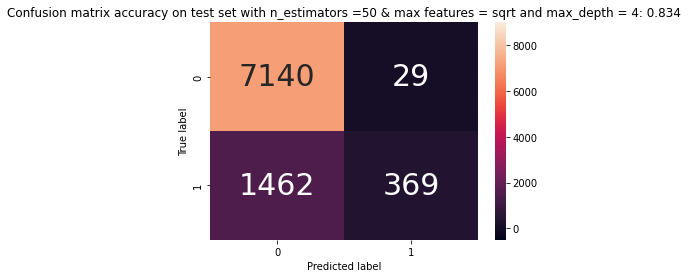

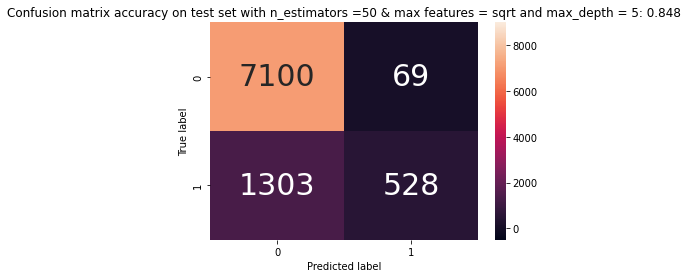

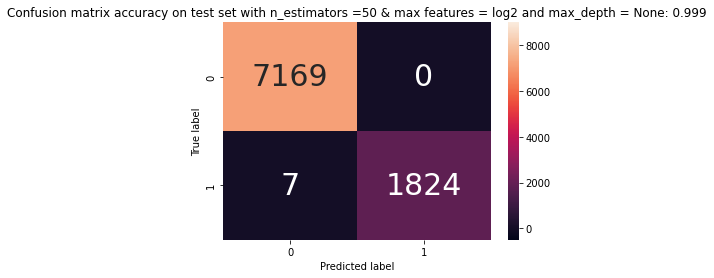

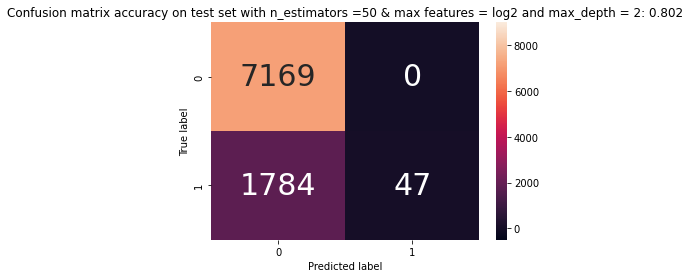

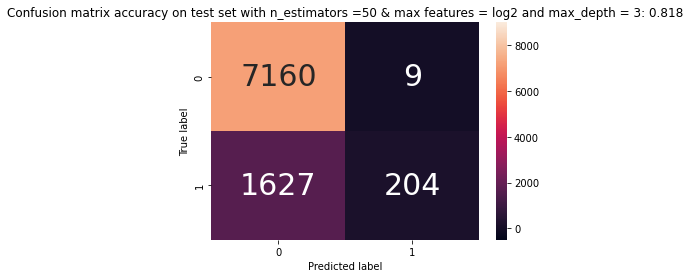

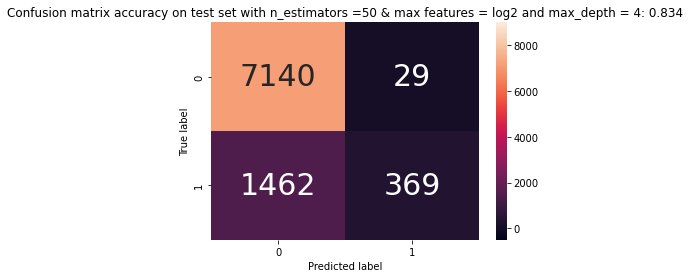

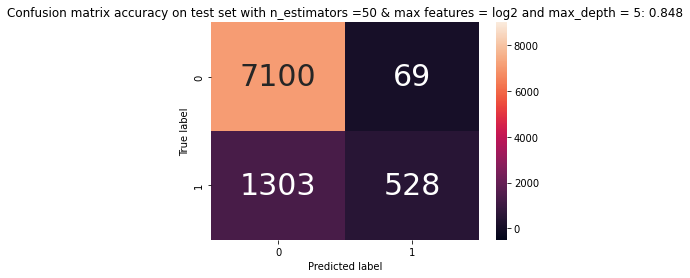

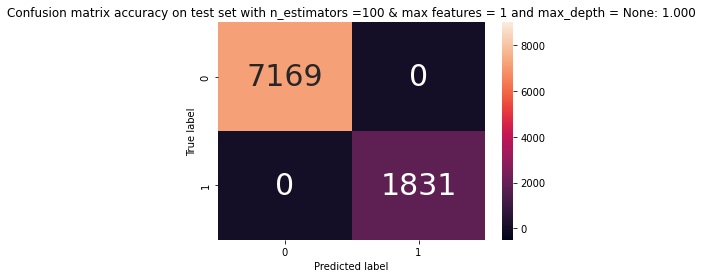

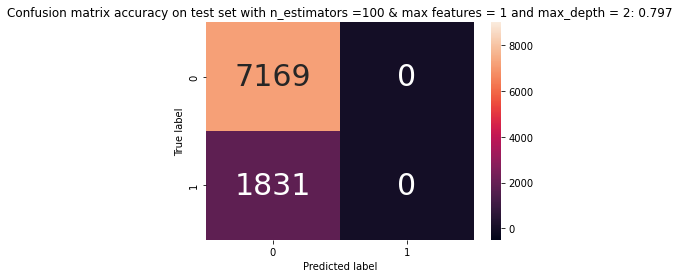

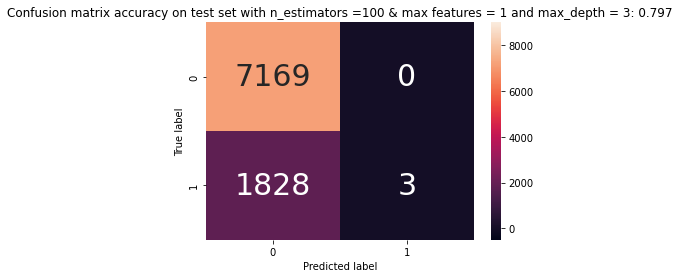

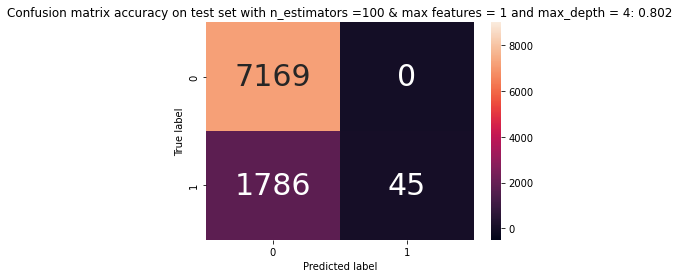

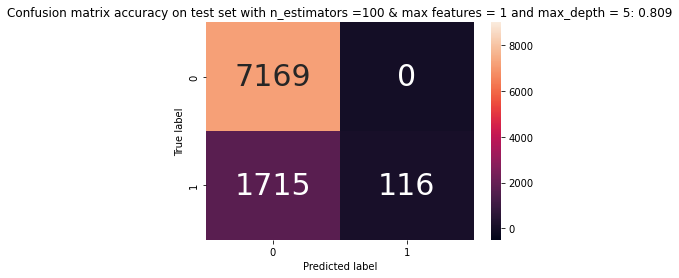

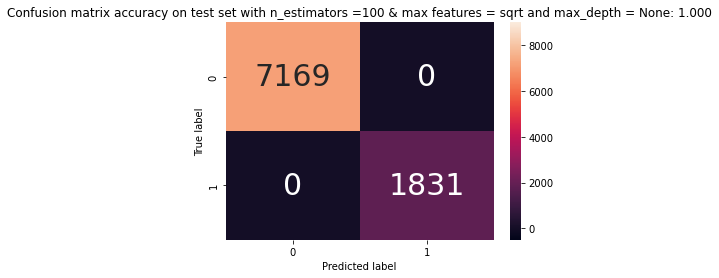

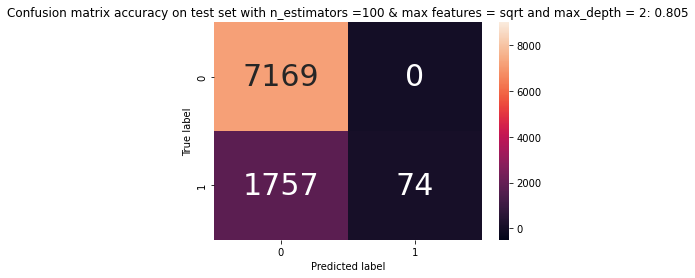

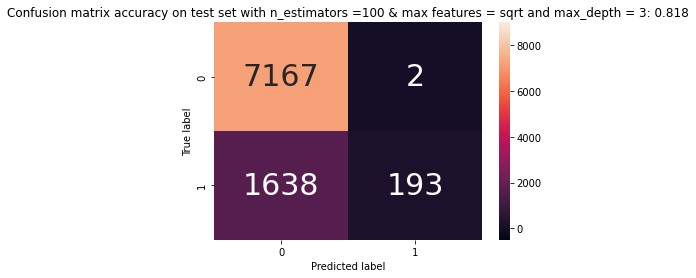

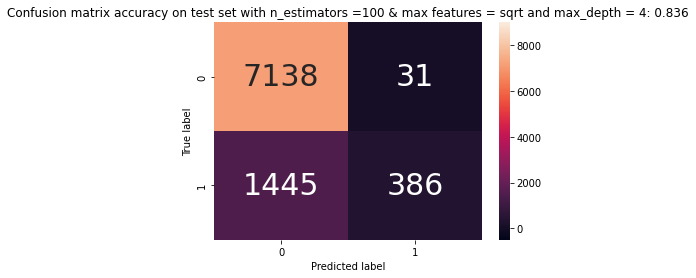

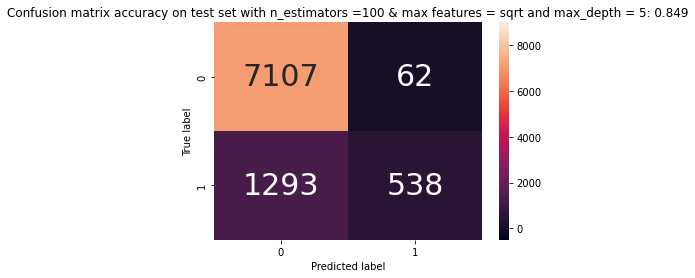

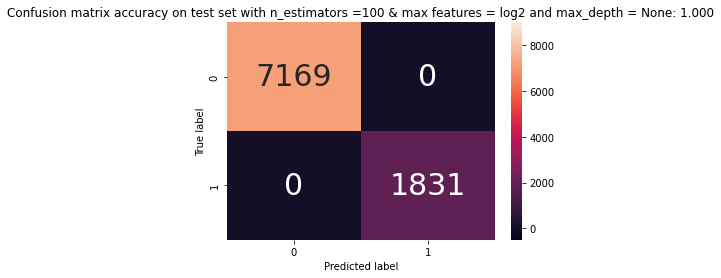

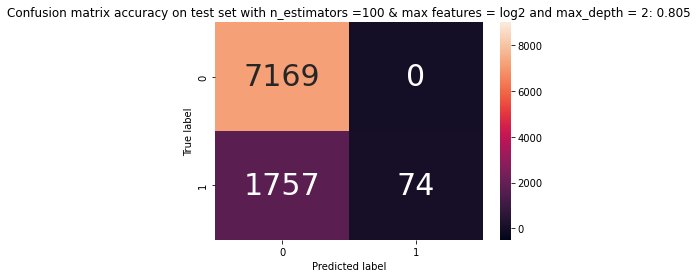

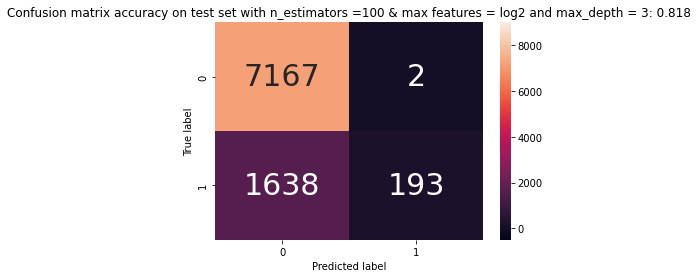

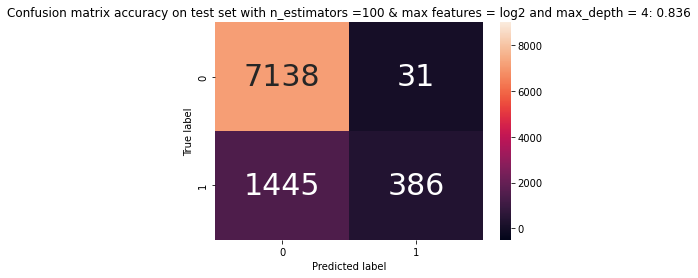

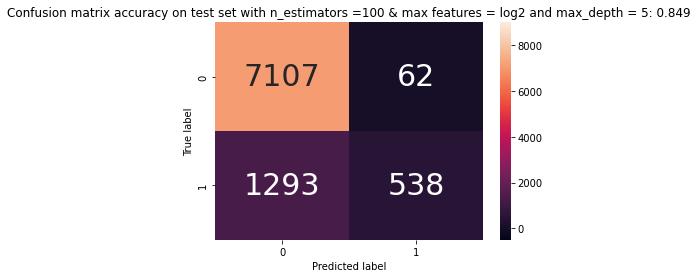

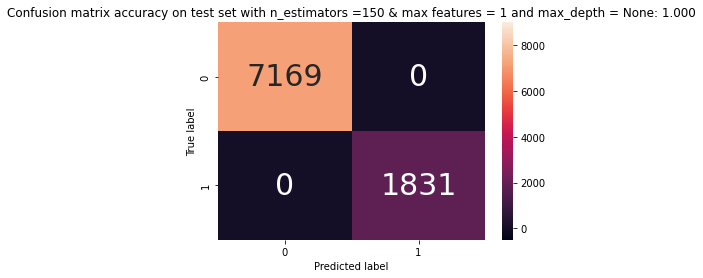

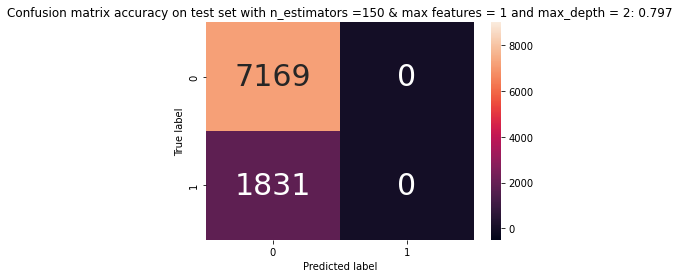

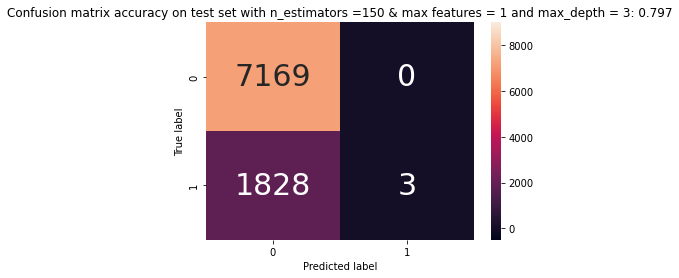

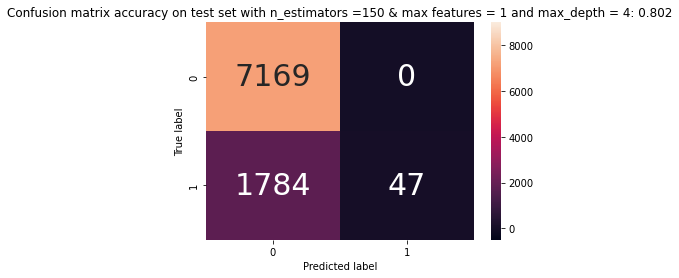

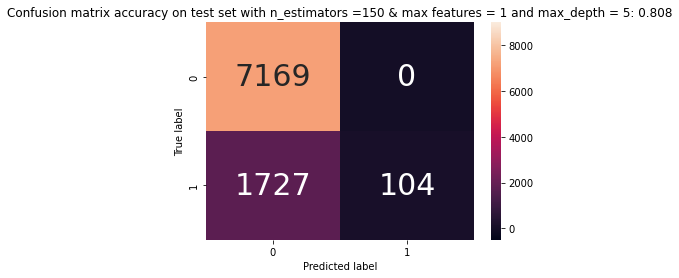

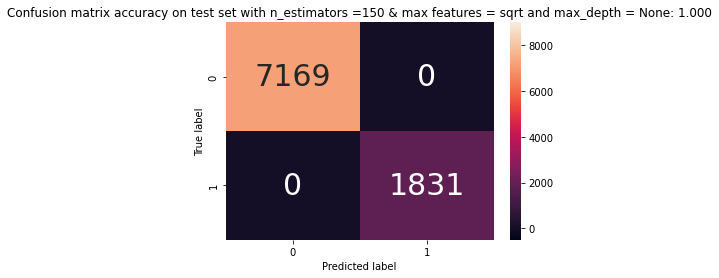

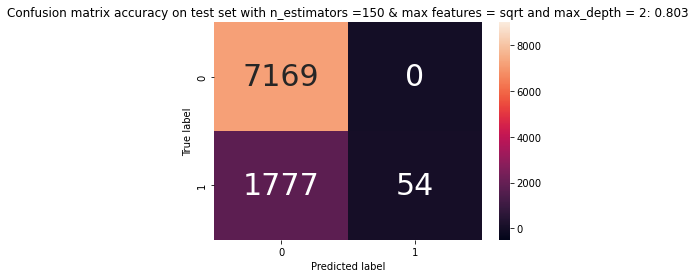

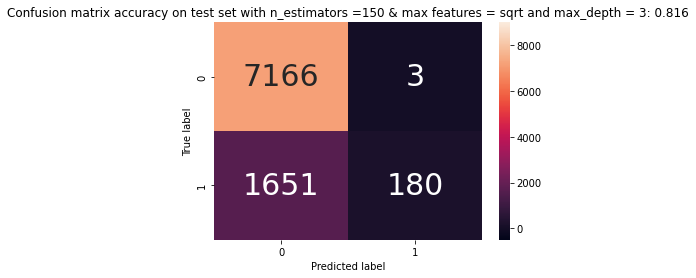

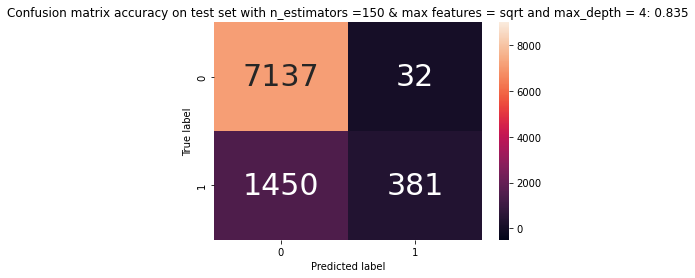

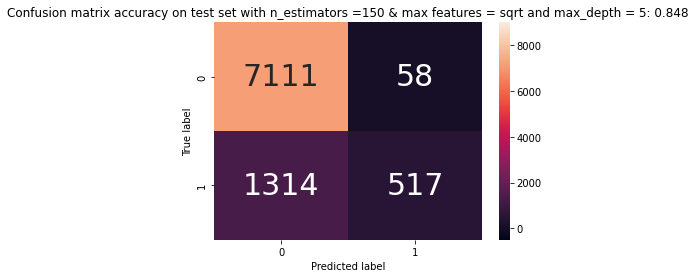

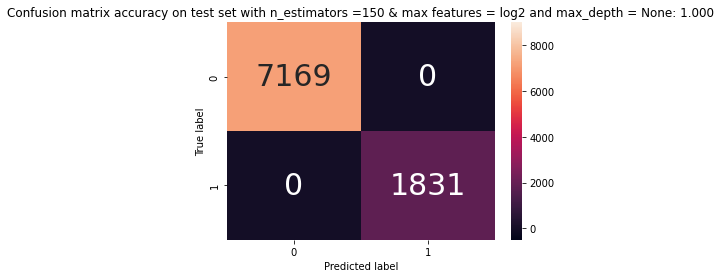

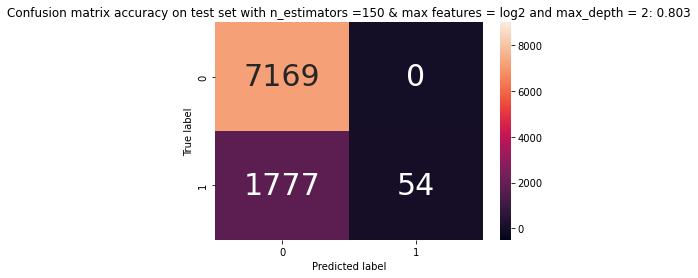

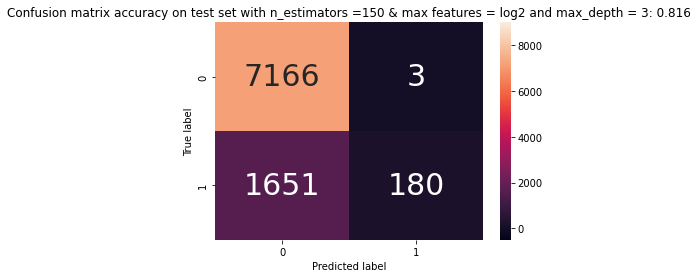

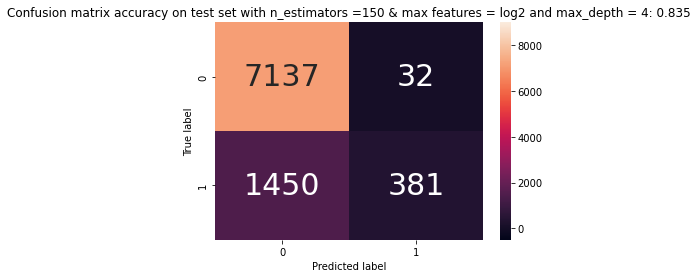

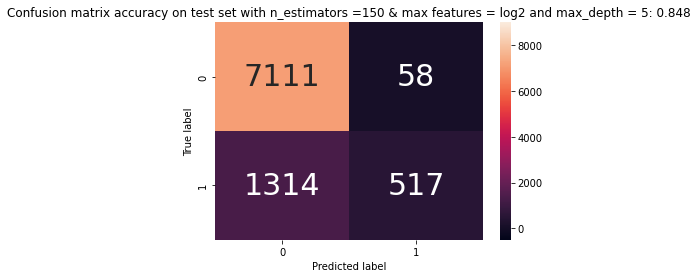

In [39]:
from itertools import product
n_estimators = [50,100,150]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for n_estimators,f, d in product(n_estimators,max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X_train)
    print('Classification accuracy on test set with n_estimators ={} & max features = {} and max_depth = {}: {:.3f}:{}'.format(n_estimators,f, d, accuracy_score(y_train, prediction_test),confusion_matrix(y_train, prediction_test).ravel()))
    cm = confusion_matrix(y_train, prediction_test)
    #cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',
    title='Confusion matrix accuracy on test set with n_estimators ={} & max features = {} and max_depth = {}: {:.3f}'.format(n_estimators,f, d, accuracy_score(y_train, prediction_test)))


In [40]:
print("Training Accuracy is: ", rf.score(X_train, y_train))

Training Accuracy is:  0.8475555555555555


1.0

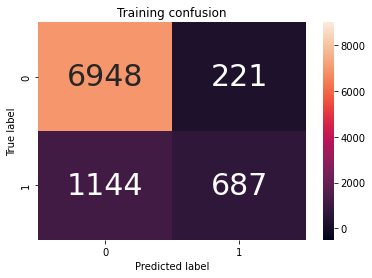

In [41]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=None, max_features ='sqrt' )
rf.fit(X_test, y_test)
prediction_test = rf.predict(X_train)
cm = confusion_matrix(y_train, prediction_test)
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',title='Training confusion')
rf.score(X_test, y_test)

# Test predictor

Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = None: 0.857:[768  26 117  89]
Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = 2: 0.794:[794   0 206   0]
Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = 3: 0.794:[794   0 206   0]
Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = 4: 0.797:[794   0 203   3]
Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = 5: 0.806:[794   0 194  12]
Classification accuracy on test set with n_estimators =50 & max features = sqrt and max_depth = None: 0.866:[763  31 103 103]
Classification accuracy on test set with n_estimators =50 & max features = sqrt and max_depth = 2: 0.808:[794   0 192  14]
Classification accuracy on test set with n_estimators =50 & max features = sqrt and max_depth = 3: 0.817:[792   2 181  25]
Classification accuracy o

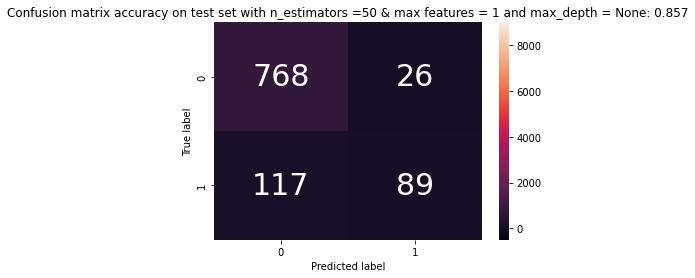

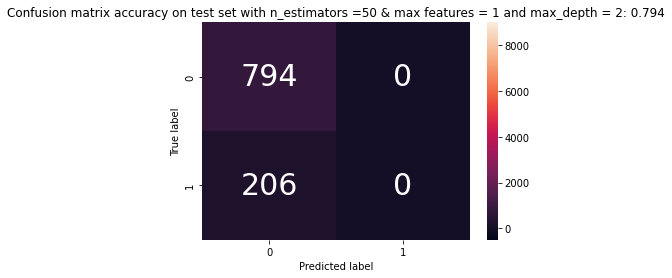

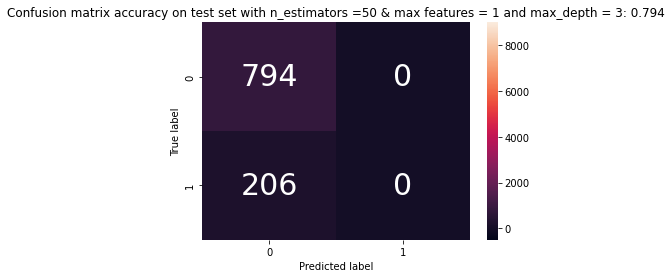

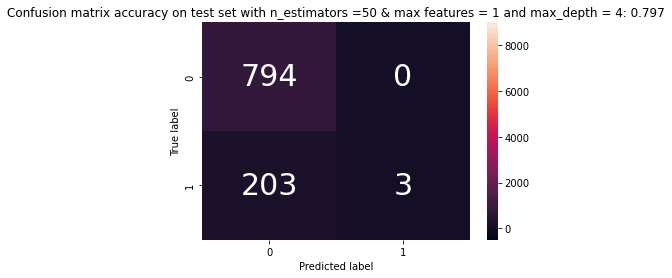

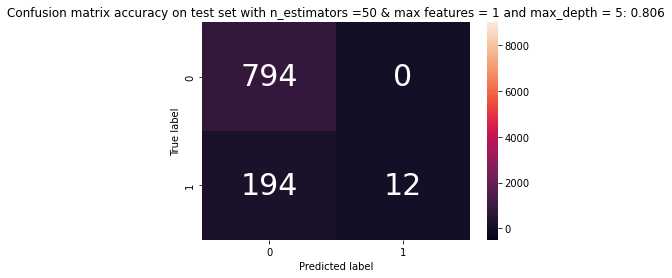

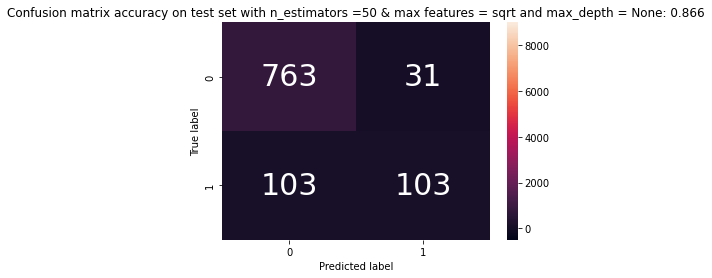

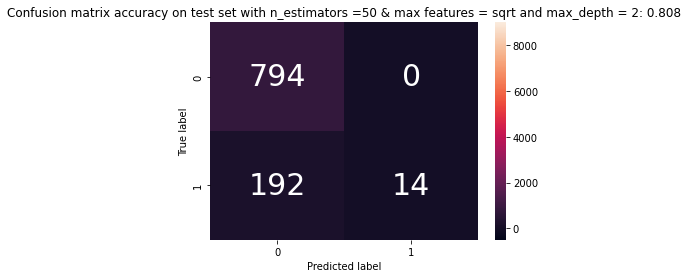

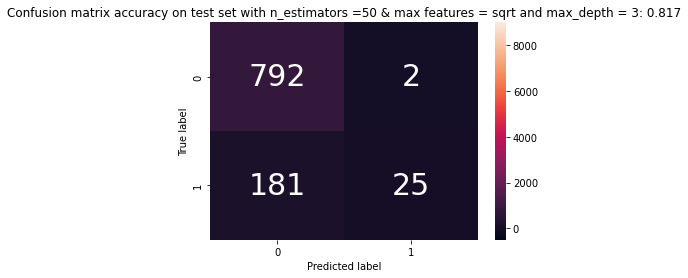

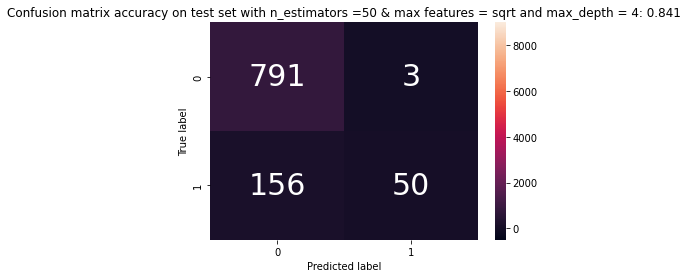

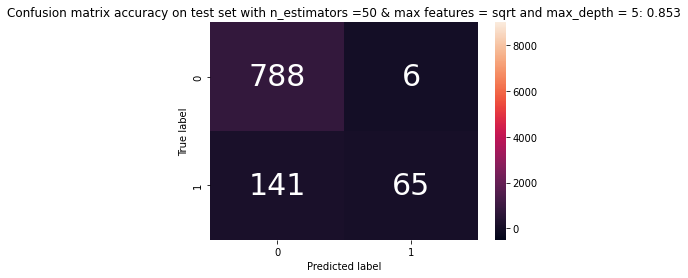

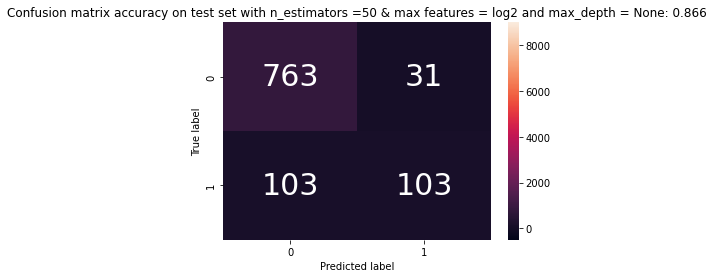

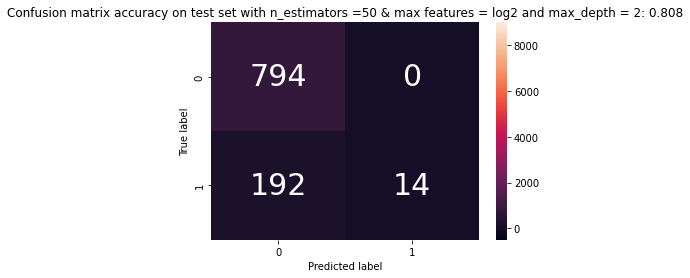

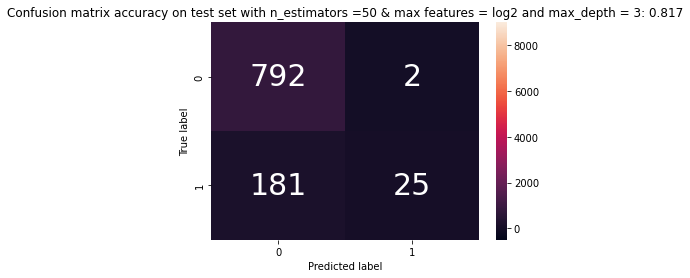

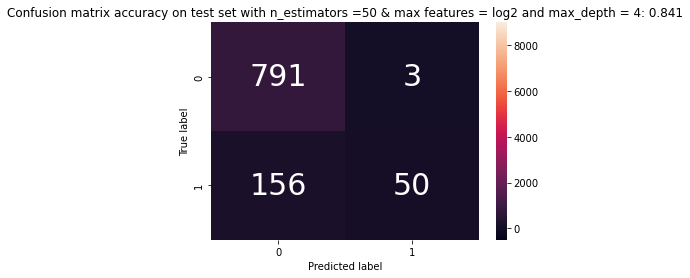

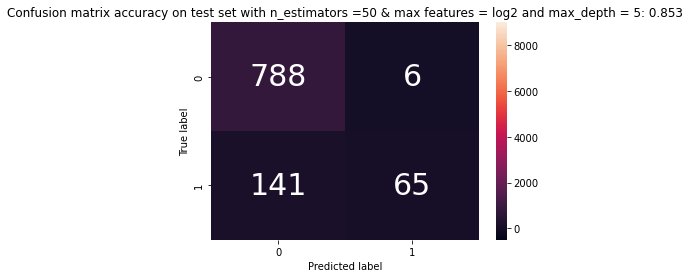

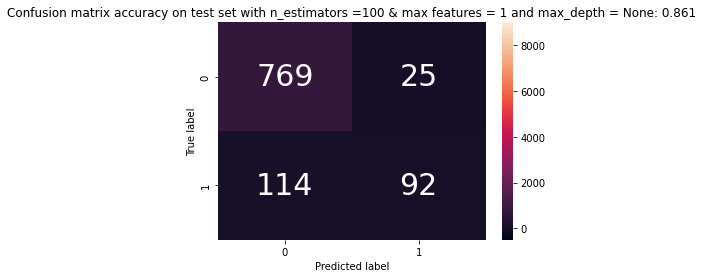

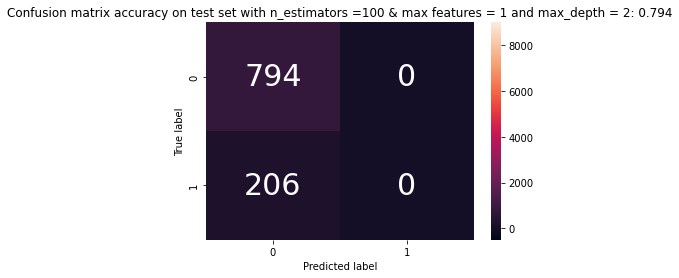

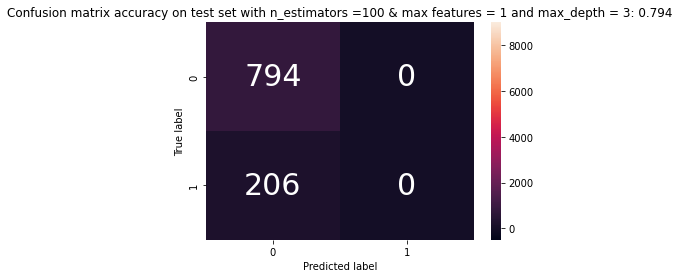

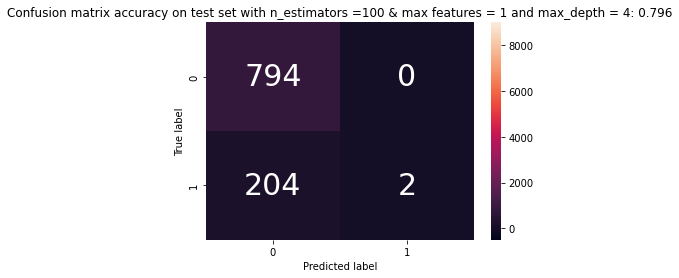

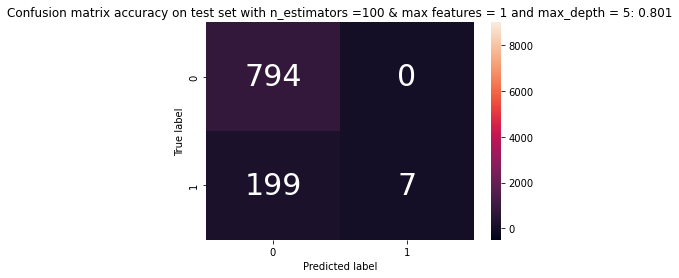

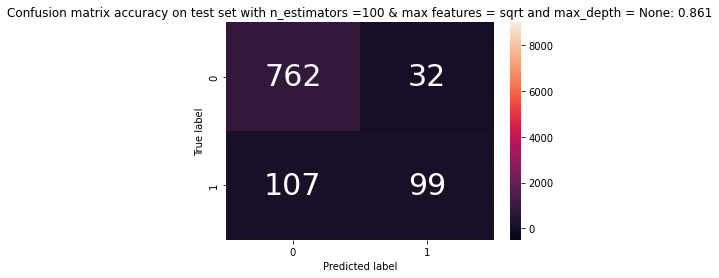

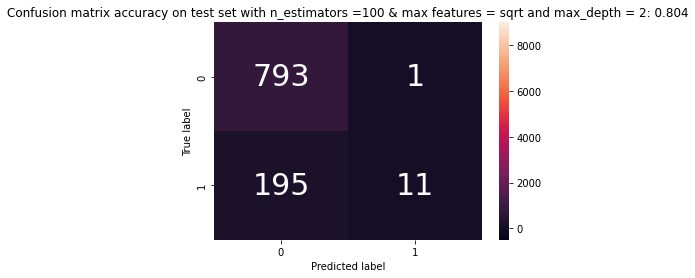

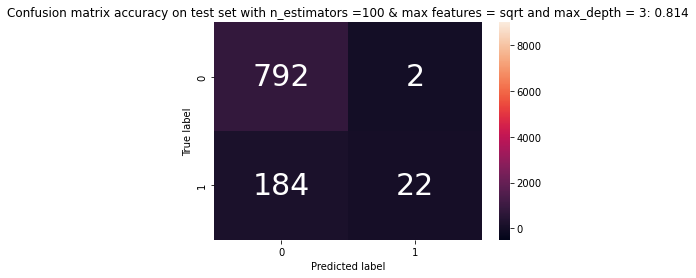

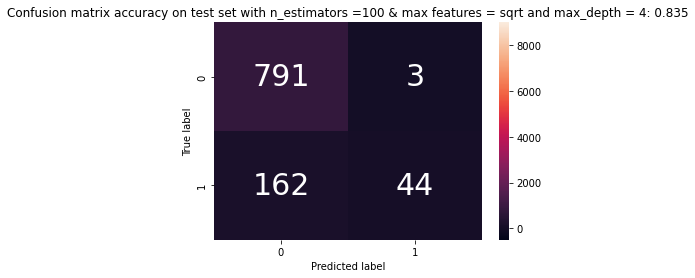

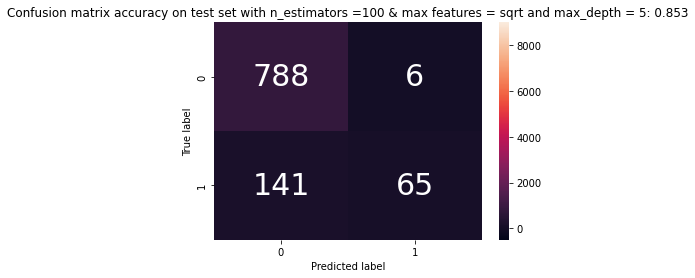

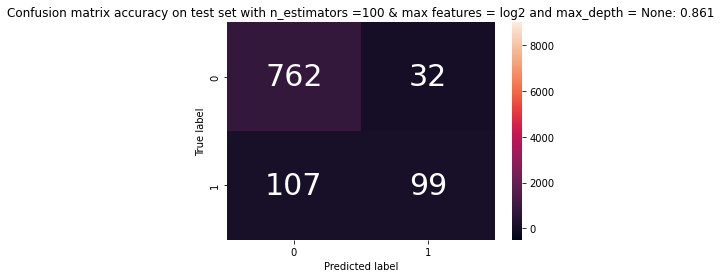

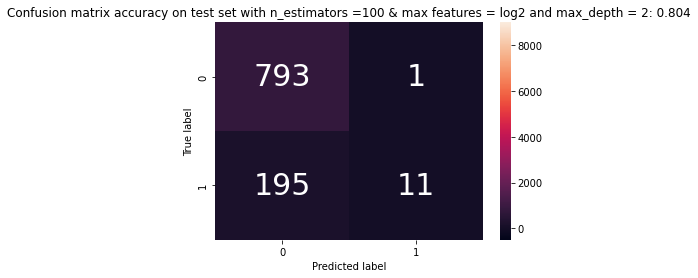

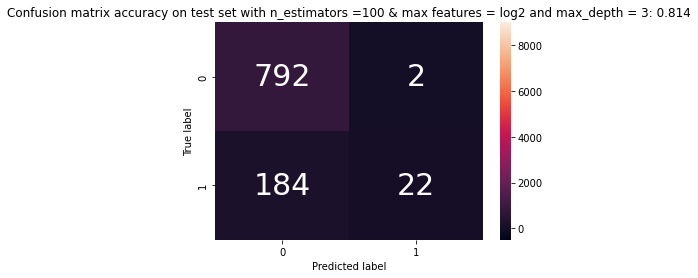

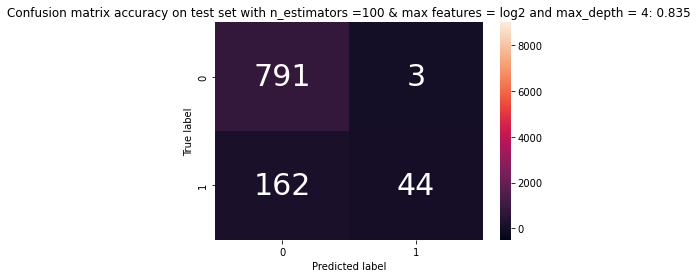

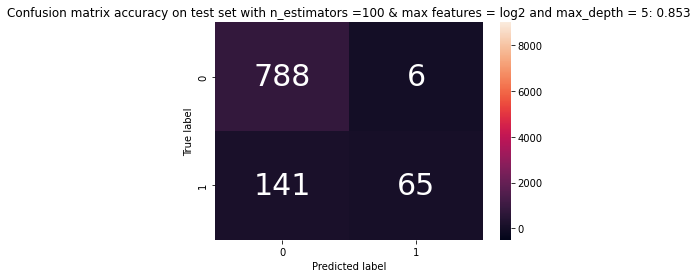

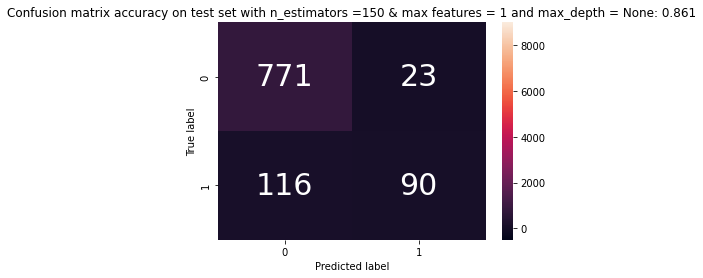

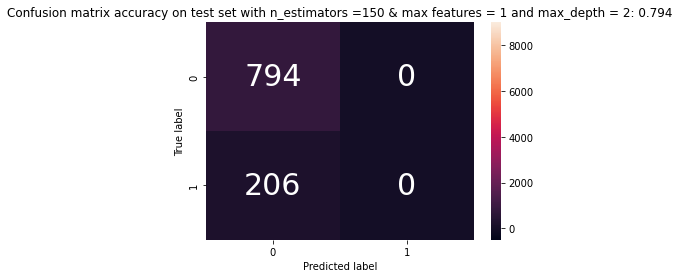

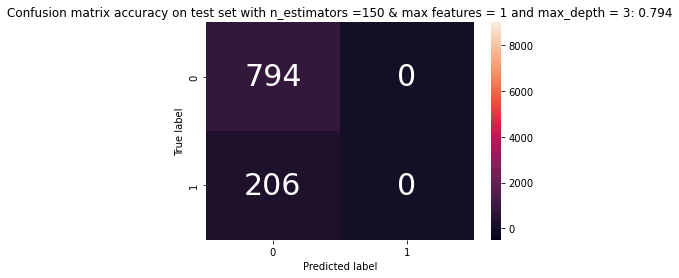

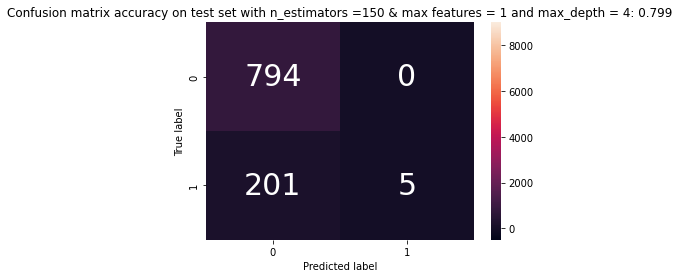

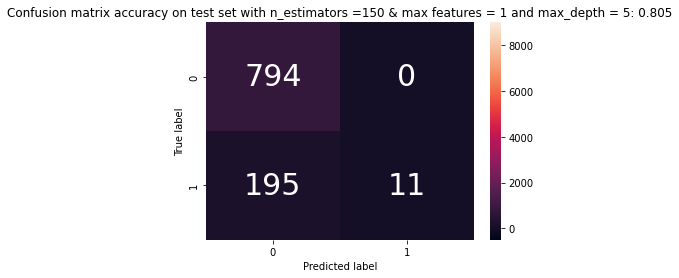

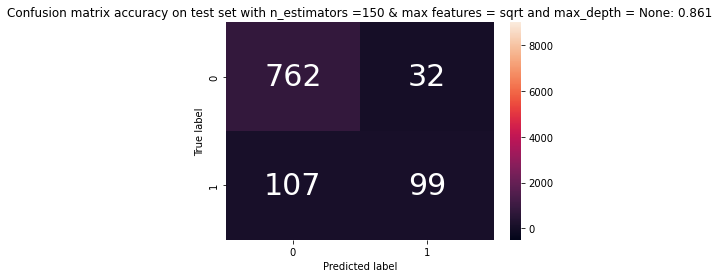

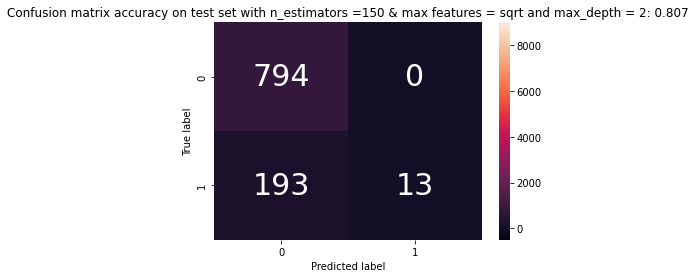

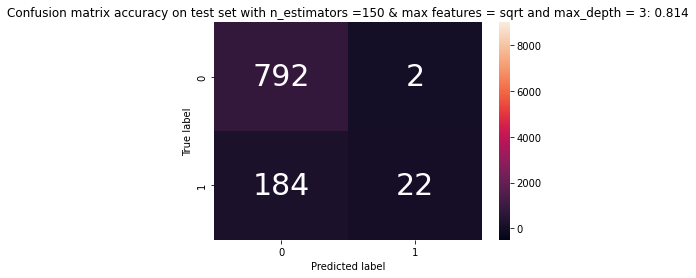

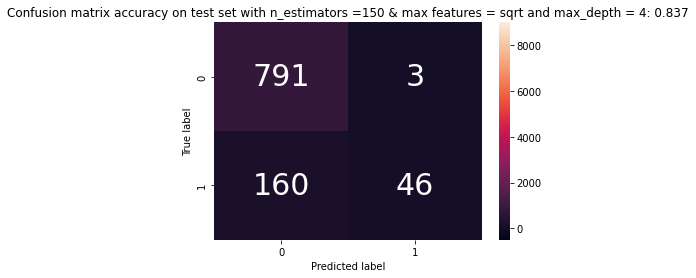

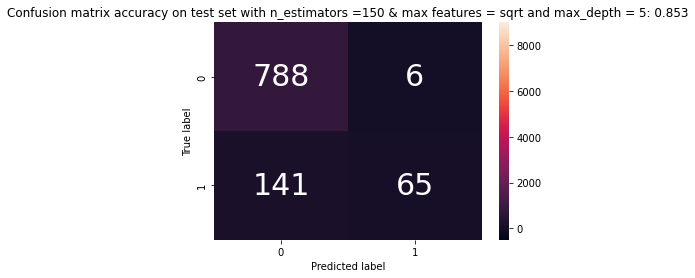

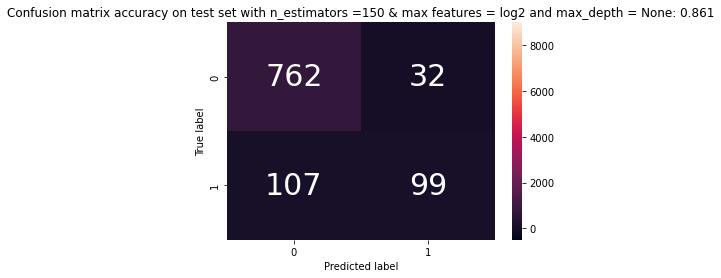

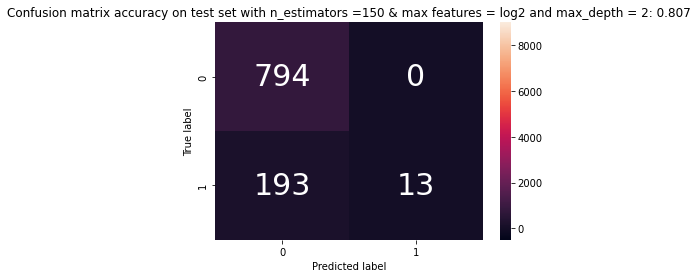

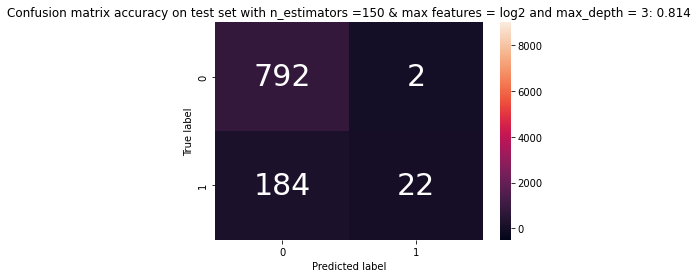

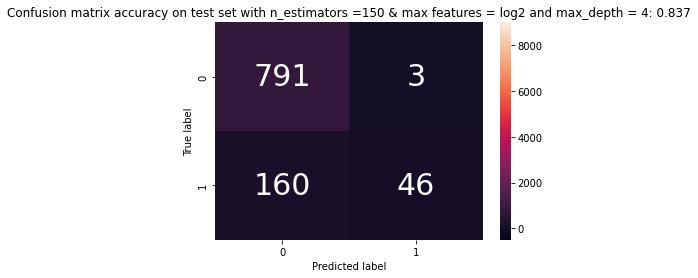

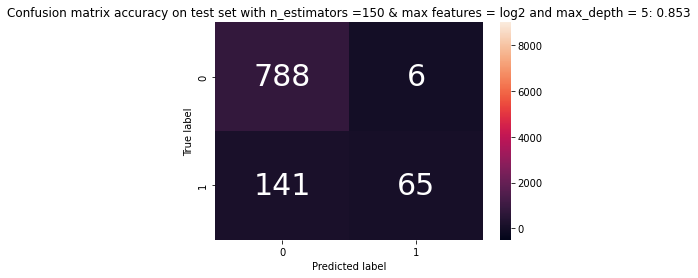

In [42]:
from itertools import product
n_estimators = [50,100,150]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for n_estimators,f, d in product(n_estimators,max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=107)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X_test)
    print('Classification accuracy on test set with n_estimators ={} & max features = {} and max_depth = {}: {:.3f}:{}'.format(n_estimators,f, d, accuracy_score(y_test, prediction_test),confusion_matrix(y_test, prediction_test).ravel()))
    cm = confusion_matrix(y_test, prediction_test)
    #cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',
    title='Confusion matrix accuracy on test set with n_estimators ={} & max features = {} and max_depth = {}: {:.3f}'.format(n_estimators,f, d, accuracy_score(y_test, prediction_test)))

In [43]:
print("Training Accuracy is: ", rf.score(X_test, y_test))

Training Accuracy is:  0.853


0.861

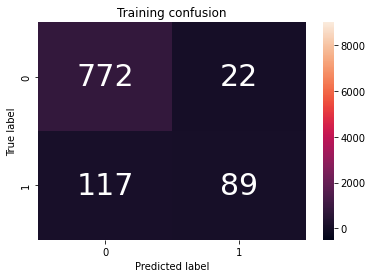

In [44]:
rf = RandomForestClassifier(n_estimators=150, criterion='entropy',max_depth=None, max_features =1)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X_test)
cm = confusion_matrix(y_test, prediction_test)
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',title='Training confusion')
rf.score(X_test, y_test)

1.0

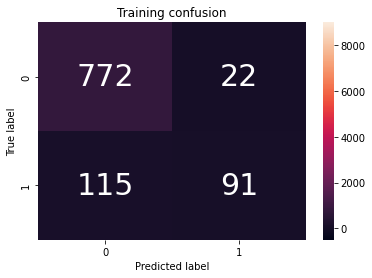

In [45]:
rf = RandomForestClassifier(n_estimators=150, criterion='entropy',max_depth=None, max_features =1)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X_test)
cm = confusion_matrix(y_test, prediction_test)
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',title='Training confusion')
rf.score(X_train, y_train)

# XGBoost

In [46]:
classifier=xgboost.XGBClassifier(tree_method='hist')

In [47]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
clf.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=7;, score=0.857 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=7;, score=0.866 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=7;, score=0.862 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=7;, score=0.866 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=7;, score=0.854 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.865 total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.862 total time=   0.0s
[CV 3/5] END colsa

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [48]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.866 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.857 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.832 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.852 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.847 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.877 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.873 total time=   0.0s
[CV 3/5] END colsamp

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

# Best parameters

In [49]:
clf.best_params_

{'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

# Getting the model with the best parameters

In [50]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [51]:
final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.12, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1,tree_method='hist')

final_model.fit(X,y)
pred_xgboost = final_model.predict(X)

# y = Y_train & pred_xgboost = prediction of X_train

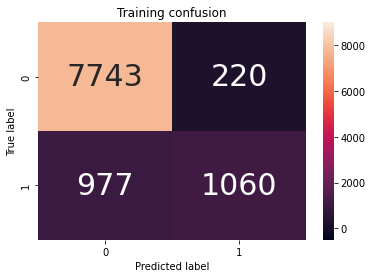

In [52]:
cm = confusion_matrix(y, pred_xgboost) 
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',title='Training confusion')

In [53]:
print("Training Accuracy is: ", final_model.score(X, y))

Training Accuracy is:  0.8803


# Train Predict

In [362]:
final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.13, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=150,
              n_jobs=1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1,tree_method='hist')

final_model.fit(X_train,y_train)
pred_xgboost = final_model.predict(X_train)

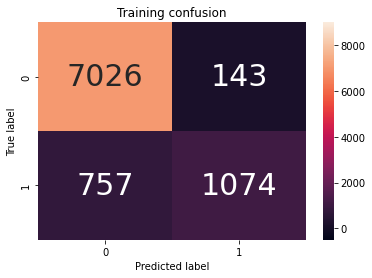

In [363]:
cm = confusion_matrix(y_train, pred_xgboost) 
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',title='Training confusion')

In [364]:
print("Training Accuracy is: ", final_model.score(X_train, y_train))


Training Accuracy is:  0.9


# Test Predict

In [342]:
final_model1 = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0, colsample_bynode=0, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.134, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=130,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=.5, reg_lambda=1,tree_method='hist')

final_model1.fit(X_train,y_train)
pred_xgboost = final_model1.predict(X_test)

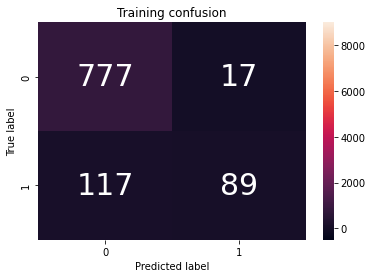

In [343]:
cm = confusion_matrix(y_test, pred_xgboost) 
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',title='Training confusion')

In [344]:
print("Testing Accuracy is: ", final_model1.score(X_test, y_test))

Testing Accuracy is:  0.866


# Training and Testing Accuracy with XGBoost

In [376]:
print("Training Accuracy is: ", final_model.score(X_train, y_train))
print("Testing Accuracy is: ", final_model1.score(X_test, y_test))

Training Accuracy is:  0.9
Testing Accuracy is:  0.866


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

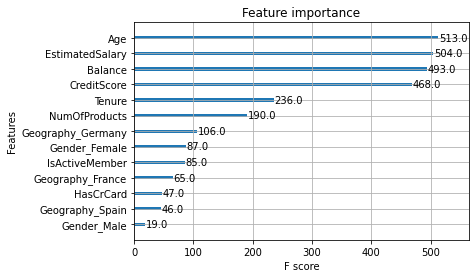

In [375]:
plot_importance(final_model)

In [62]:
ud = pd.read_csv('C:/Users/mosto/OneDrive/Documents/churnunseen.csv', encoding='latin-1')
ud.head()
np.shape(ud)

(3344, 13)

In [63]:
print(ud.isnull().sum())

rowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [64]:
ud2 = ud[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [65]:
ud2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
3339,599,Spain,Female,28,4,126833.79,2,1,0,60843.09
3340,729,Germany,Male,29,5,109676.52,1,1,1,25548.47
3341,718,France,Female,29,3,0.00,1,0,1,134462.29
3342,712,Germany,Male,53,6,134729.99,2,1,1,132702.64


# dummy variables(from category data to numerical)

In [66]:
ud2 = pd.get_dummies(ud2, columns = ['Geography','Gender'])

In [67]:
ud2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,599,28,4,126833.79,2,1,0,60843.09,0,0,1,1,0
3340,729,29,5,109676.52,1,1,1,25548.47,0,1,0,0,1
3341,718,29,3,0.00,1,0,1,134462.29,1,0,0,1,0
3342,712,53,6,134729.99,2,1,1,132702.64,0,1,0,0,1


# Data Scaling

In [68]:
scale_vars = ['CreditScore','EstimatedSalary','Balance']
ud2[scale_vars] = scaler.fit_transform(ud2[scale_vars])


# Making predictions 

In [365]:
pred_xgboost = final_model.predict(ud2.values)

In [366]:
np.shape(pred_xgboost)

(3344,)

# Probability

In [367]:
pred_prob_xgboost = final_model.predict_proba(ud2.values)

In [368]:
pred_prob_xgboost

array([[0.68354106, 0.31645894],
       [0.8226628 , 0.17733724],
       [0.02029073, 0.97970927],
       ...,
       [0.87962353, 0.12037646],
       [0.8269367 , 0.17306331],
       [0.92613214, 0.07386785]], dtype=float32)

In [369]:
np.shape(pred_prob_xgboost)

(3344, 2)

In [370]:
# function to select second column for probabilities
def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_prob_xgboost, 1)
print(column(pred_prob_xgboost, 1))

[0.31645894, 0.17733724, 0.97970927, 0.045910396, 0.049724806, 0.23379491, 0.027956525, 0.9918173, 0.06396585, 0.03193131, 0.022457529, 0.01489264, 0.0682755, 0.020112636, 0.024299286, 0.14189641, 0.98432124, 0.020361647, 0.5519944, 0.021323683, 0.019440893, 0.028421314, 0.3743737, 0.031162785, 0.24700227, 0.003316964, 0.17084017, 0.0485505, 0.37300533, 0.10854762, 0.83815575, 0.06769679, 0.17174272, 0.053336203, 0.015067327, 0.6464809, 0.033612892, 0.017453471, 0.11682638, 0.06322762, 0.2084183, 0.8532829, 0.24768876, 0.66688293, 0.21372062, 0.087057255, 0.25889114, 0.5500155, 0.22879773, 0.083563514, 0.035253253, 0.07979703, 0.029619984, 0.5062673, 0.5775294, 0.19816063, 0.30657968, 0.05452182, 0.9341246, 0.4766378, 0.34339654, 0.03976059, 0.13048531, 0.14220233, 0.09656304, 0.04030524, 0.3012781, 0.06334806, 0.030796492, 0.037712853, 0.9995265, 0.16630803, 0.10778531, 0.032594994, 0.012263557, 0.05601664, 0.041387472, 0.20686771, 0.030935511, 0.26384056, 0.055483006, 0.4074185, 0.03

In [371]:
np.shape(column(pred_prob_xgboost, 1))

(3344,)

# Joining the raw data witht the predictions

In [372]:
output = ud.copy()
output['Predictions - Churn or Not'] = pred_xgboost
output['Predictions - Probability to Churn'] = column(pred_prob_xgboost, 1)
output['Predictions - Churn or Not Desc'] = 'Empty'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 0] = 'Retention'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 1] = 'Churn'
output.head()

,rowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Predictions - Churn or Not,Predictions - Probability to Churn,Predictions - Churn or Not Desc
0,1,15634638,AP Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0.316459,Retention
1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.177337,Retention
2,3,15619340,AP Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.979709,Churn
3,4,15701390,AP Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.045910,Retention
4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.049725,Retention


# Exporting the data in a CSV

In [377]:
output.to_csv('Churn Final Predictions Output.csv', sep='\t')
os. getcwd() 

'C:\\Users\\mosto\\OneDrive\\Desktop\\Jupyter Note'

In [378]:
output['Predictions - Churn or Not'].value_counts()

0    2864
1     480
Name: Predictions - Churn or Not, dtype: int64